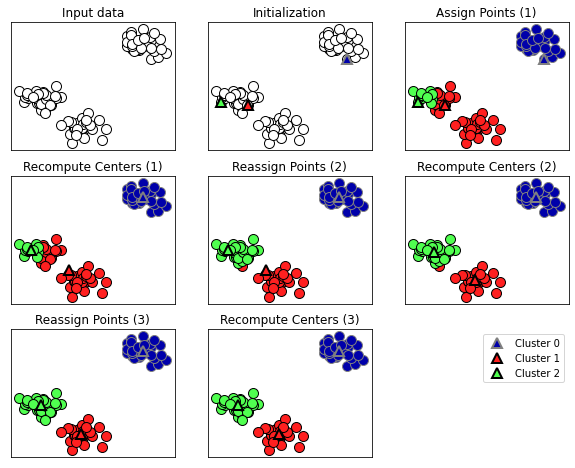

In [2]:
import mglearn
mglearn.plots.plot_kmeans_algorithm()

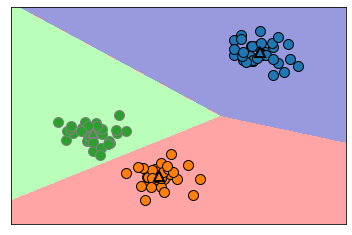

In [3]:
mglearn.plots.plot_kmeans_boundaries()

In [4]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [6]:
X, y = make_blobs(random_state=1)
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

NameError: name 'model' is not defined

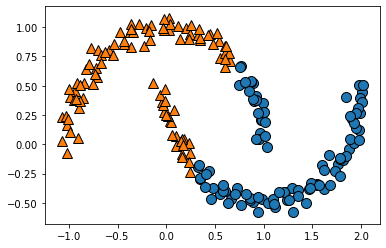

In [9]:
from sklearn.datasets import make_moons
X,y = make_moons(n_samples=200, noise=0.05, random_state=0)
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_ = kmeans.predict(X)
mglearn.discrete_scatter(X[:,0],X[:,1],y_)
mglearn.discrete_scatter(model.cluster_centers_[:,0], model.culster_centers_[:,1], markers='s')

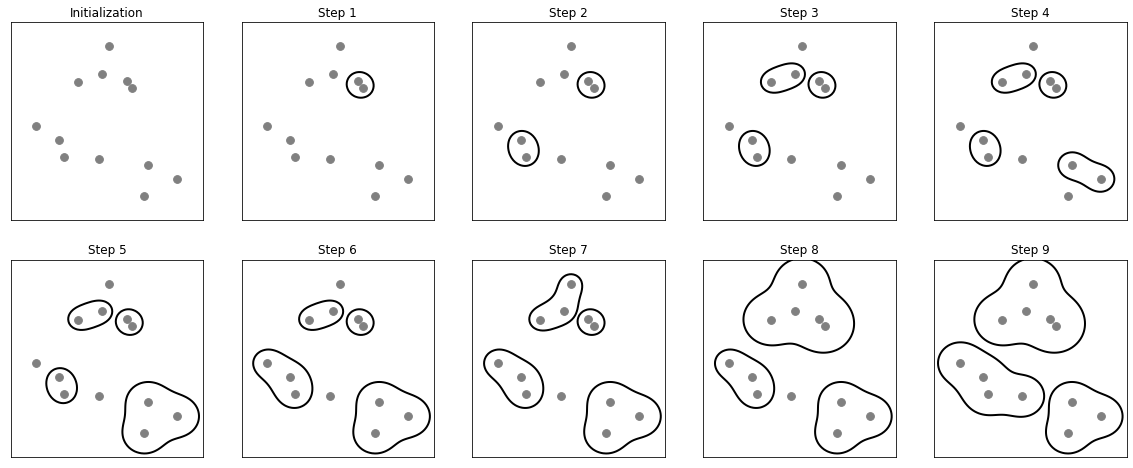

In [10]:
mglearn.plots.plot_agglomerative_algorithm()

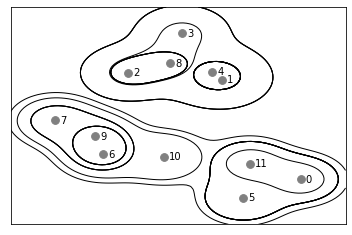

In [14]:
# 위 과정을 누적해서 보여줌
mglearn.plots.plot_agglomerative()

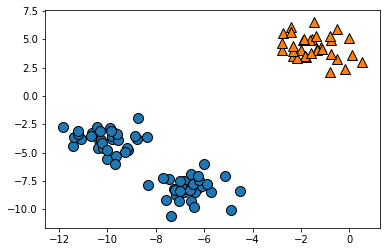

In [13]:
# 병합군집
from sklearn.cluster import AgglomerativeClustering
X, y = make_blobs(random_state=1)
agg_model = AgglomerativeClustering()    # 병합군집에 아무것도 안넣었을 때
y_ = agg_model.fit_predict(X)
mglearn.discrete_scatter(X[:,0],X[:,1], y_)

min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


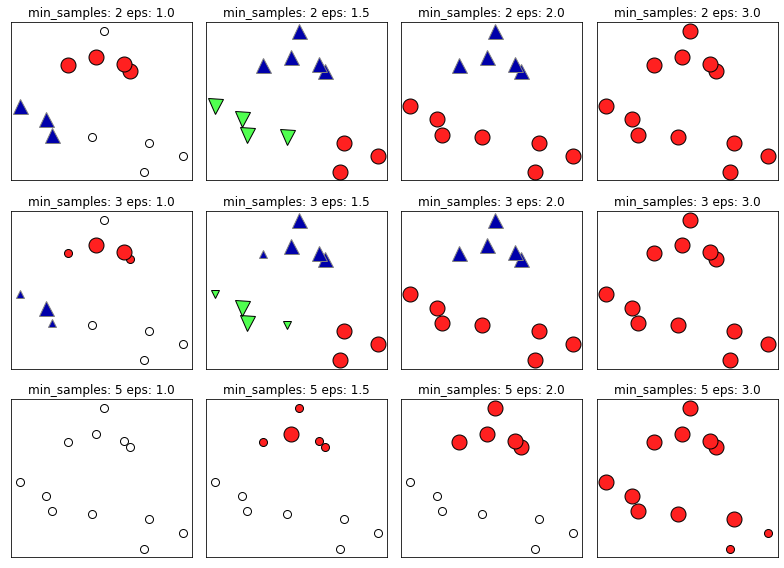

In [15]:
mglearn.plots.plot_dbscan()

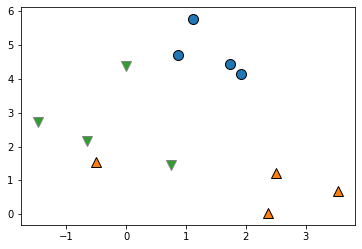

In [18]:
from sklearn.cluster import DBSCAN
X, y = make_blobs(random_state=0, n_samples=12)
mglearn.discrete_scatter(X[:,0], X[:,1], y)

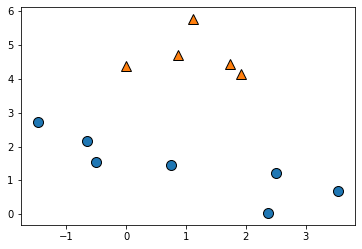

In [22]:
dbscan = DBSCAN(eps=1.2)
y_ = dbscan.fit_predict(X)
mglearn.discrete_scatter(X[:,0], X[:,1], y_)  # 클러스터링을 하나도 못함->eps를 주어 컨트롤
# DBSCAN은 eps를 주어야 함.

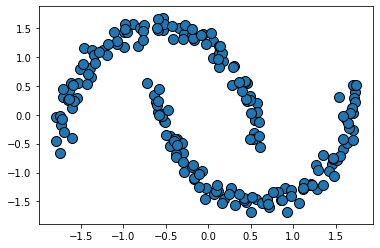

In [33]:
X,y = make_moons(n_samples=200, noise=0.05, random_state=0)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_ = scaler.transform(X)
bdscan = DBSCAN(eps=0.05)
y_ = dbscan.fit_predict(X_)
mglearn.discrete_scatter(X_[:,0], X_[:,1], y_)
# 노이즈만 있어 같은색깔로 나옴

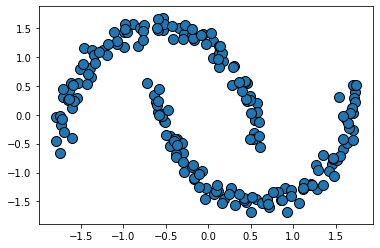

In [36]:
X,y = make_moons(n_samples=200, noise=0.05, random_state=0)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_ = scaler.transform(X)
bdscan = DBSCAN(eps=0.7)
y_ = dbscan.fit_predict(X_)
mglearn.discrete_scatter(X_[:,0], X_[:,1], y_)

In [ ]:
# Chapter 12. p.363 k-means 군집 마케팅 분석

In [37]:
import pandas as pd
import math

In [39]:
retail_df = pd.read_excel('Online_Retail.xlsx')
retail_df[:5]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [40]:
retail_df.info()
# Description and CustomerID 결측치가 있음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [41]:
# 오류 데이터 정제 (음수값 제거, null값 제거)
retail_df = retail_df[retail_df['Quantity']>0]
retail_df = retail_df[retail_df['UnitPrice']>0]
retail_df = retail_df[retail_df['CustomerID'].notnull()]

In [42]:
# CustomerID 실수형 -> 정수형 변환
retail_df['CustomerID'] = retail_df['CustomerID'].astype(int)

In [44]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  int32         
 7   Country      397884 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(4)
memory usage: 25.8+ MB


In [45]:
# null값이 있으면 더해서 보여주기
retail_df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [46]:
retail_df.shape

(397884, 8)

In [47]:
# 중복값 제거
retail_df.drop_duplicates(inplace=True)
retail_df.shape

(392692, 8)

In [48]:
# 제품 수
len(retail_df['StockCode'].value_counts())

3665

In [49]:
# 거래 건수
len(retail_df['InvoiceNo'].value_counts())

18532

In [51]:
# 고객 수
len(retail_df['CustomerID'].value_counts())

4338

In [52]:
retail_df['Country'].value_counts()

United Kingdom          349203
Germany                   9025
France                    8326
EIRE                      7226
Spain                     2479
Netherlands               2359
Belgium                   2031
Switzerland               1841
Portugal                  1453
Australia                 1181
Norway                    1071
Italy                      758
Channel Islands            747
Finland                    685
Cyprus                     603
Sweden                     450
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     245
Unspecified                241
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         57
Lebanon                     45
Lithuani

In [53]:
retail_df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [55]:
# 주문금액 열 추가(SaleAmount)
retail_df['SaleAmount'] = retail_df['UnitPrice']*retail_df['Quantity']
retail_df[:5]  # = .head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,SaleAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [81]:
work_table = {'InvoiceNo':'count', 'SaleAmount':'sum', 'InvoiceDate':'max'}
customer_df = retail_df.groupby('CustomerID').agg(work_table)
customer_df = customer_df.reset_index() # 0부터 index 만들기
customer_df[:5]

,CustomerID,InvoiceNo,SaleAmount,InvoiceDate
0,12346,1,77183.60,2011-01-18 10:01:00
1,12347,182,4310.00,2011-12-07 15:52:00
2,12348,31,1797.24,2011-09-25 13:13:00
3,12349,73,1757.55,2011-11-21 09:51:00
4,12350,17,334.40,2011-02-02 16:01:00


In [82]:
# 열 이름 바꾸기
customer_df = customer_df.rename(columns = {'InvoiceNo':'Freq', 'InvoiceDate':'ElapsedDays'})
customer_df[:5]
# ElapsedDays - 최근 주문일자

,CustomerID,Freq,SaleAmount,ElapsedDays
0,12346,1,77183.60,2011-01-18 10:01:00
1,12347,182,4310.00,2011-12-07 15:52:00
2,12348,31,1797.24,2011-09-25 13:13:00
3,12349,73,1757.55,2011-11-21 09:51:00
4,12350,17,334.40,2011-02-02 16:01:00


In [83]:
import datetime
print(datetime.datetime(2011,12,10))

2011-12-10 00:00:00


In [84]:
# 최근 주문시간부터 지정 날짜까지 얼마나 지났는지
customer_df['ElapsedDays'] = datetime.datetime(2011,12,10) - customer_df['ElapsedDays']
customer_df[:3]

,CustomerID,Freq,SaleAmount,ElapsedDays
0,12346,1,77183.60,325 days 13:59:00
1,12347,182,4310.00,2 days 08:08:00
2,12348,31,1797.24,75 days 10:47:00


In [85]:
# 시간을 하루로 올림하여 계산
customer_df['ElapsedDays'] = customer_df['ElapsedDays'].apply(lambda x:x.days+1)
customer_df[:3]

,CustomerID,Freq,SaleAmount,ElapsedDays
0,12346,1,77183.60,326
1,12347,182,4310.00,3
2,12348,31,1797.24,76


In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

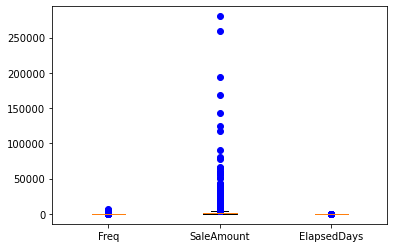

In [87]:
# 데이터 값이 치우쳐짐을 확인하기 위해 boxplot -> 극단적임
fig, ax = plt.subplots()
ax.boxplot([customer_df['Freq'], customer_df['SaleAmount'], customer_df['ElapsedDays']], sym='bo')
plt.xticks([1,2,3], ['Freq', 'SaleAmount', 'ElapsedDays'])
plt.show()
# SaleAmount에 치우침이 심함

In [88]:
# log 처리 (훈련만 하기 위해, 데이터 업데이트에는 필요 없음 drop)
import numpy as np
customer_df['Freq_log'] = np.log1p(customer_df['Freq'])
customer_df['SaleAmount_log'] = np.log1p(customer_df['SaleAmount'])
customer_df['ElapsedDays_log'] = np.log1p(customer_df['ElapsedDays'])
customer_df[:3]

,CustomerID,Freq,SaleAmount,ElapsedDays,Freq_log,SaleAmount_log,ElapsedDays_log
0,12346,1,77183.60,326,0.693147,11.253955,5.789960
1,12347,182,4310.00,3,5.209486,8.368925,1.386294
2,12348,31,1797.24,76,3.465736,7.494564,4.343805


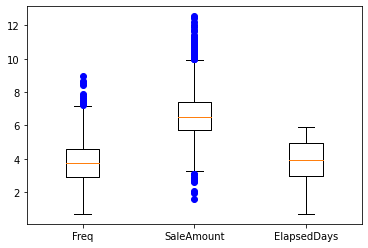

In [92]:
# log처리한 boxplot
fig, ax = plt.subplots()
ax.boxplot([customer_df['Freq_log'], customer_df['SaleAmount_log'], customer_df['ElapsedDays_log']], sym='bo')
plt.xticks([1,2,3], ['Freq', 'SaleAmount', 'ElapsedDays'])
plt.show()

In [90]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

In [96]:
X = customer_df[['Freq_log','SaleAmount_log','ElapsedDays_log']].values
X.shape
# 비지도라 y 없음

(4338, 3)

In [97]:
from sklearn.preprocessing import StandardScaler
X_s = StandardScaler().fit_transform(X)

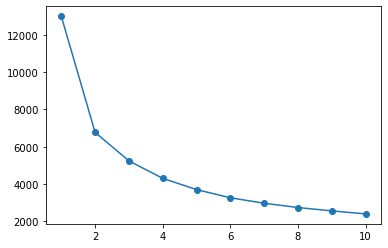

In [98]:
distortions = []
for i in range(1,11):
    kmeans_model_i = KMeans(n_clusters=i, random_state=0)  # 모델생성
    kmeans_model_i.fit(X_s)                                # 모델 훈련
    distortions.append(kmeans_model_i.inertia_)
plt.plot(range(1,11), distortions, marker='o')
plt.show()

In [99]:
kmeans_k3 = KMeans(n_clusters=3, random_state=0)

In [100]:
y_ = kmeans_k3.fit_predict(X_s)

In [101]:
customer_df['ClusterLabel'] = y_
customer_df[:3]

,CustomerID,Freq,SaleAmount,ElapsedDays,Freq_log,SaleAmount_log,ElapsedDays_log,ClusterLabel
0,12346,1,77183.60,326,0.693147,11.253955,5.789960,2
1,12347,182,4310.00,3,5.209486,8.368925,1.386294,1
2,12348,31,1797.24,76,3.465736,7.494564,4.343805,2


In [102]:
# 결과분석, 시각화
from matplotlib import cm

In [113]:
def silhouetteViz(n_cluster, X):
    kmeans = KMeans(n_clusters=n_cluster, random_state = 0)
    y_ = kmeans.fit_predict(X)
    silhouette_values = silhouette_samples(X, y_, metric = 'euclidean')
    y_ax_lower, y_ax_upper = 0,0
    y_ticks=[]
    
    for c in range(n_cluster):
        c_silhouettes = silhouette_values[y_ == c]
        c_silhouettes.sort()
        y_ax_upper += len(c_silhouettes)
        color = cm.jet(float(c)/n_cluster)
        plt.barh(range(y_ax_lower, y_ax_upper), c_silhouettes, height=1.0, edgecolor = 'none', color = color)
        y_ticks.append((y_ax_lower + y_ax_upper)/2.0)
        y_ax_lower += len(c_silhouettes)
        
    silhouette_avg = np.mean(silhouette_values)
    plt.axvline(silhouette_avg, color = 'red', linestyle = '--')
    plt.title('Num of cluster:'+str(n_cluster)+'\n'+'Silhouette score:'+str(round(silhouette_avg, 3)))
    plt.yticks(y_ticks, range(n_cluster))
    plt.xticks([0,0.2,0.4,0.6,0.8,1])
    plt.ylabel('Cluster')
    plt.xlabel('silhouette_coefficient')
    plt.tight_layout()
    plt.show()

In [123]:
def clusterScatter(n_cluster, X):
    c_colors = []
    kmeans = KMeans(n_clusters = n_cluster, random_state=0)
    y_ = kmeans.fit_predict(X)
    
    for i in range(n_cluster):
        c_color = cm.jet(float(i)/n_cluster)
        c_colors.append(c_color)
        plt.scatter(X[y_==i,0], X[y_==i,1], marker='o', color=c_color, edgecolor='black', s=50, label='cluster'+str(i))
    for i in range(n_cluster):
        plt.scatter(kmeans.cluster_centers_[i,0], kmeans.cluster_centers_[i,1], marker = '^', color = c_colors[i], edgecolor = 'w', s=200)
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

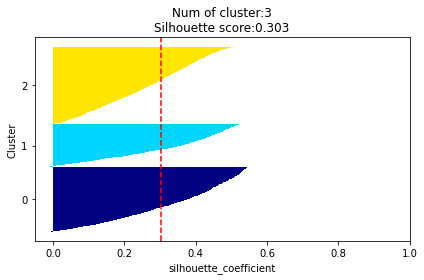

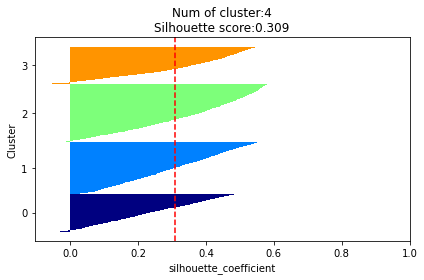

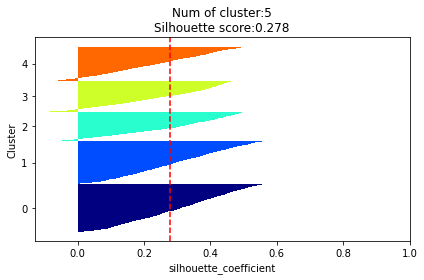

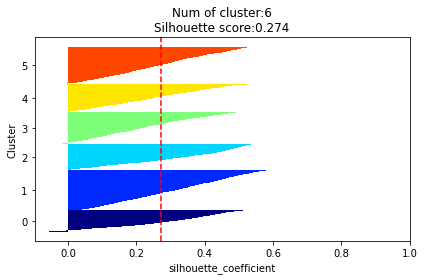

In [117]:
silhouetteViz(3,X_s)
silhouetteViz(4,X_s)  # 실루엣이 가장 높음
silhouetteViz(5,X_s)
silhouetteViz(6,X_s)

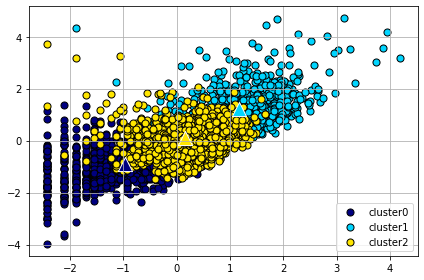

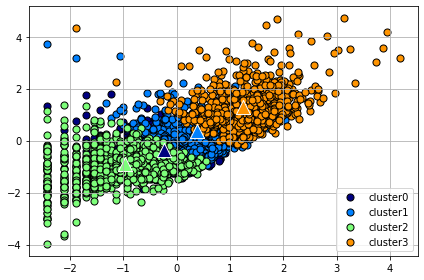

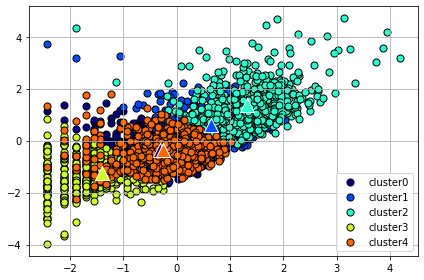

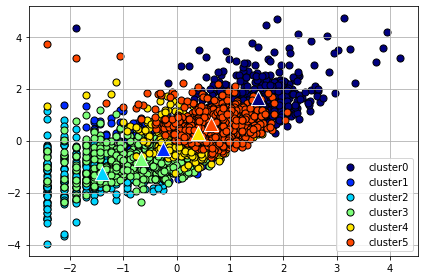

In [124]:
clusterScatter(3, X_s)
clusterScatter(4, X_s)
clusterScatter(5, X_s)
clusterScatter(6, X_s)

In [125]:
best_cluster = 4
kmeans =KMeans(n_clusters=best_cluster, random_state=0)
y_ = kmeans.fit_predict(X_s)

In [127]:
# best인 4로 업데이트
customer_df['ClusterLabel'] =y_
customer_df[:20]

,CustomerID,Freq,SaleAmount,ElapsedDays,Freq_log,SaleAmount_log,ElapsedDays_log,ClusterLabel
0,12346,1,77183.60,326,0.693147,11.253955,5.789960,1
1,12347,182,4310.00,3,5.209486,8.368925,1.386294,3
2,12348,31,1797.24,76,3.465736,7.494564,4.343805,1
3,12349,73,1757.55,19,4.304065,7.472245,2.995732,1
4,12350,17,334.40,311,2.890372,5.815324,5.743003,2
5,12352,85,2506.04,37,4.454347,7.826858,3.637586,1
6,12353,4,89.00,205,1.609438,4.499810,5.327876,2
7,12354,58,1079.40,233,4.077537,6.985087,5.455321,1
8,12355,13,459.40,215,2.639057,6.132096,5.375278,2
9,12356,59,2811.43,23,4.094345,7.941804,3.178054,1


In [128]:
customer_df.to_csv('Online_Retail_Customer_Cluster.csv')

In [129]:
# 추가분석 -> 라벨을 기준으로 집계
customer_df.groupby('ClusterLabel')['CustomerID'].count()

ClusterLabel
0     891
1    1207
2    1368
3     872
Name: CustomerID, dtype: int64

In [135]:
# log제거 (훈련만 하는 것, df에 포함되지 않아도 됨)
customer_cluster_df = customer_df.drop(['Freq_log', 'SaleAmount_log','ElapsedDays_log'], axis=1, inplace=False)

In [136]:
customer_cluster_df

,CustomerID,Freq,SaleAmount,ElapsedDays,ClusterLabel
0,12346,1,77183.60,326,1
1,12347,182,4310.00,3,3
2,12348,31,1797.24,76,1
3,12349,73,1757.55,19,1
4,12350,17,334.40,311,2
...,...,...,...,...,...
4333,18280,10,180.60,278,2
4334,18281,7,80.82,181,2
4335,18282,12,178.05,8,0
4336,18283,721,2045.53,4,3
